In [1]:
!git clone https://github.com/aycakrk/DI725_Ayca.git

Cloning into 'DI725_Ayca'...
remote: Enumerating objects: 171, done.
remote: Counting objects: 100% (171/171), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 171 (delta 55), reused 157 (delta 44), pack-reused 0 (from 0)
Receiving objects: 100% (171/171), 2.02 MiB | 8.19 MiB/s, done.
Resolving deltas: 100% (55/55), done.


In [2]:
import pandas as pd

# Dosyaları yükle
train_df = pd.read_csv('/content/DI725_Ayca/assignment_1/data/customer_service/train.csv')
test_df = pd.read_csv('/content/DI725_Ayca/assignment_1/data/customer_service/test.csv')

# İlk birkaç satırı görüntüle
print("Train Data:")
print(train_df.head())

print('-----------------------')

print("\nTest Data:")
print(test_df.head())

print('-----------------------------------------------------------------------------------')

# Sütun isimlerini kontrol et
print("\nTrain Data Column Names:", train_df.columns)
print('-----------------------')
print("Test Data Column Names:", test_df.columns)

# Basic info about dataset
print("\nTraining Dataset Info:")
print(train_df.info())

print("\nTest Dataset Info:")
print(test_df.info())

Train Data:
                  issue_area                        issue_category  \
0          Login and Account  Mobile Number and Email Verification   
1  Cancellations and returns                   Pickup and Shipping   
2  Cancellations and returns        Replacement and Return Process   
3          Login and Account       Login Issues and Error Messages   
4                      Order                 Order Delivery Issues   

                                  issue_sub_category  \
0  Verification requirement for mobile number or ...   
1           Reasons for being asked to ship the item   
2             Inability to click the 'Cancel' button   
3  Error message regarding exceeded attempts to e...   
4                       Delivery not attempted again   

                         issue_category_sub_category customer_sentiment  \
0  Mobile Number and Email Verification -> Verifi...            neutral   
1  Pickup and Shipping -> Reasons for being asked...            neutral   
2  Re

In [3]:
# Eğitim ve test veri setlerindeki toplam satır sayısını kontrol et
print(f"Total rows in training data: {len(train_df)}")
print(f"Total rows in test data: {len(test_df)}")


Total rows in training data: 970
Total rows in test data: 30


In [4]:
print("Missing Values of Train Data:")
print(train_df.isnull().sum())

print("\nMissing Values of Test Data:")
print(test_df.isnull().sum())

# Analyzing the sentiment distribution
print("\nSentiment Distribution in Training Data:")
print(train_df['customer_sentiment'].value_counts(normalize=True))



Missing Values of Train Data:
issue_area                     0
issue_category                 0
issue_sub_category             0
issue_category_sub_category    0
customer_sentiment             0
product_category               0
product_sub_category           0
issue_complexity               0
agent_experience_level         0
agent_experience_level_desc    0
conversation                   0
dtype: int64

Missing Values of Test Data:
issue_area                     0
issue_category                 0
issue_sub_category             0
issue_category_sub_category    0
customer_sentiment             0
product_category               0
product_sub_category           0
issue_complexity               0
agent_experience_level         0
agent_experience_level_desc    0
conversation                   0
dtype: int64

Sentiment Distribution in Training Data:
customer_sentiment
neutral     0.558763
negative    0.423711
positive    0.017526
Name: proportion, dtype: float64


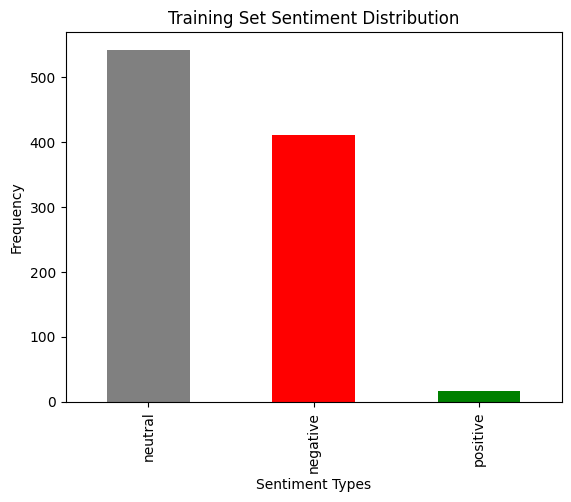

In [5]:
import matplotlib.pyplot as plt

# Sentiment distribution in the training set
train_df['customer_sentiment'].value_counts().plot(kind='bar', color=['gray', 'red', 'green'])
plt.title('Training Set Sentiment Distribution')
plt.xlabel('Sentiment Types')
plt.ylabel('Frequency')
plt.show()


Step 3: Text Data Insights
To further understand the text data, we'll look into the length of the conversations and any notable patterns or anomalies in the text content.


Summary Statistics for Conversation Lengths:
count     970.000000
mean     2129.284536
std       564.751035
min        46.000000
25%      1760.250000
50%      2058.500000
75%      2430.000000
max      5708.000000
Name: text_length, dtype: float64


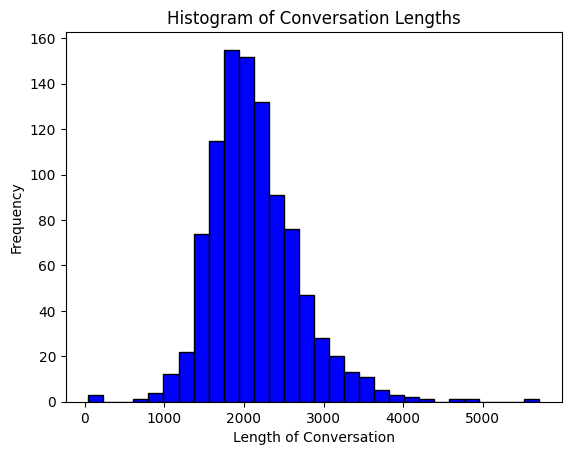

In [6]:
# Adding a new column for text length for analysis
train_df['text_length'] = train_df['conversation'].apply(len)

# Summary statistics for text length
print("\nSummary Statistics for Conversation Lengths:")
print(train_df['text_length'].describe())

# Histogram to visualize the distribution of conversation lengths
plt.hist(train_df['text_length'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Conversation Lengths')
plt.xlabel('Length of Conversation')
plt.ylabel('Frequency')
plt.show()


In [7]:
import pandas as pd
import re

def clean_text(text):
    # Convert text to lowercase for uniformity
    text = text.lower()

    # Retain letters, spaces, periods, question marks, exclamation marks, and colons
    text = re.sub(r'[^a-z\s:.!?]', '', text)

    # Remove unnecessary spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text


# Load the datasets
train_data_path = '/content/DI725_Ayca/assignment_1/data/customer_service/train.csv'
test_data_path = '/content/DI725_Ayca/assignment_1/data/customer_service/test.csv'
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

# Apply the cleaning function to the conversation column in both datasets
train_df['cleaned_conversation'] = train_df['conversation'].apply(clean_text)
test_df['cleaned_conversation'] = test_df['conversation'].apply(clean_text)

# Display some of the cleaned data to ensure it's processed as expected
print("Cleaned Training Data:")
print(train_df['cleaned_conversation'].head())
print("\nCleaned Test Data:")
print(test_df['cleaned_conversation'].head())



Cleaned Training Data:
0    agent: thank you for calling brownbox customer...
1    agent: thank you for calling brownbox customer...
2    agent: thank you for calling brownbox customer...
3    customer: hi i am facing an issue while loggin...
4    agent: thank you for contacting brownbox custo...
Name: cleaned_conversation, dtype: object

Cleaned Test Data:
0    agent: thank you for calling brownbox customer...
1    agent: thank you for calling brownbox customer...
2    agent: thank you for calling brownbox customer...
3    agent: thank you for calling brownbox customer...
4    agent: thank you for calling brownbox customer...
Name: cleaned_conversation, dtype: object


In [8]:
# Specify the paths where you want to save the cleaned data
cleaned_train_data_path = '/content/DI725_Ayca/assignment_1/data/customer_service/cleaned_train.csv'
cleaned_test_data_path = '/content/DI725_Ayca/assignment_1/data/customer_service/cleaned_test.csv'

# Save the cleaned dataframes to CSV files
train_df.to_csv(cleaned_train_data_path, index=False)
test_df.to_csv(cleaned_test_data_path, index=False)

print("Cleaned training data saved to:", cleaned_train_data_path)
print("Cleaned test data saved to:", cleaned_test_data_path)


Cleaned training data saved to: /content/DI725_Ayca/assignment_1/data/customer_service/cleaned_train.csv
Cleaned test data saved to: /content/DI725_Ayca/assignment_1/data/customer_service/cleaned_test.csv


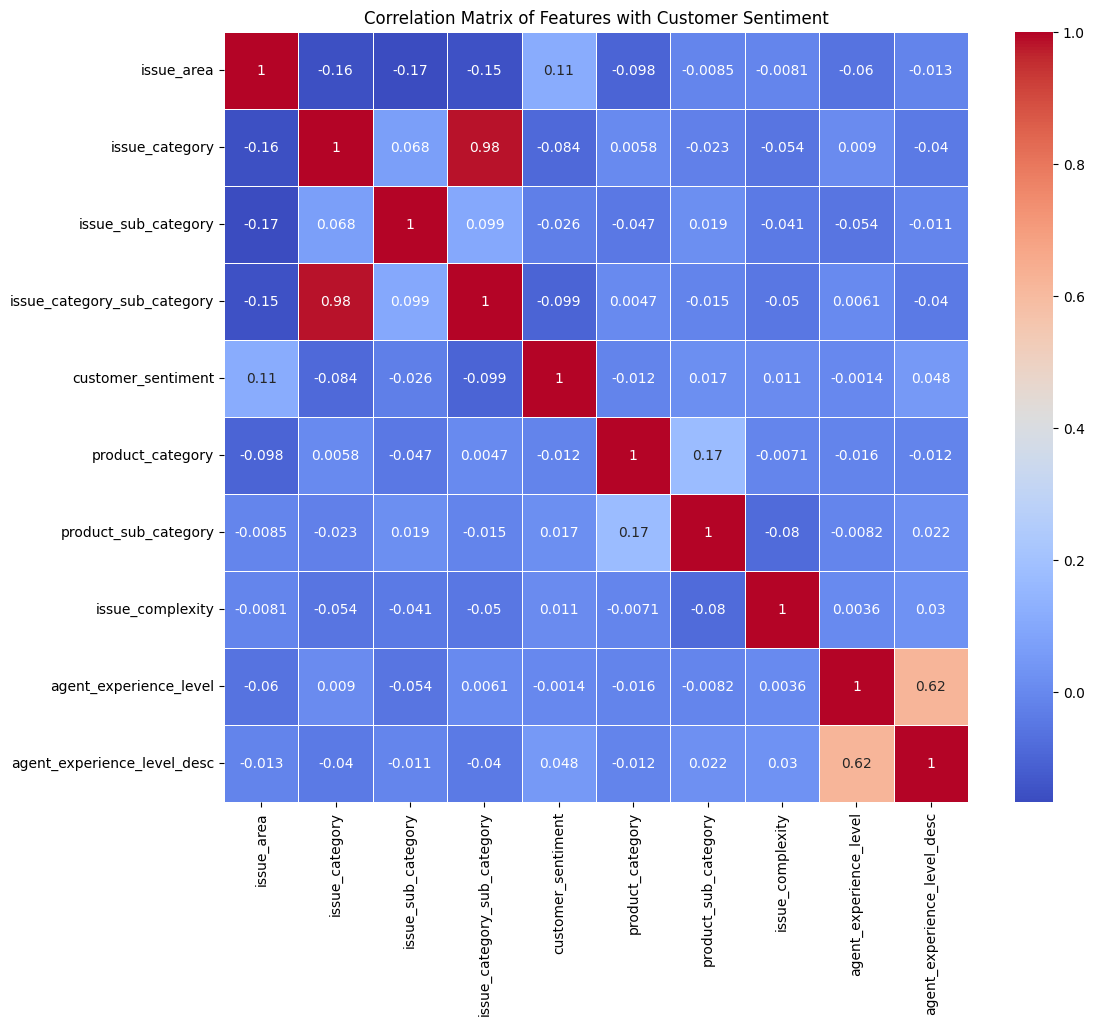

In [ ]:
#do not run this since it changes the type (will be done in prepare.py, not to mix the types. It was made for one time to see the correlation)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

train_df = pd.read_csv('/content/DI725_Ayca/assignment_1/data/customer_service/train.csv')

# Kategorik sütunları belirle
categorical_columns = [
    'issue_area', 'issue_category', 'issue_sub_category', 'issue_category_sub_category',
    'product_category', 'product_sub_category',
    'issue_complexity', 'agent_experience_level', 'agent_experience_level_desc'
]

# Kategorik sütunları Label Encode et
label_encoders = {}
for col in categorical_columns:
    if train_df[col].dtype == 'object':
        le = LabelEncoder()
        train_df[col] = le.fit_transform(train_df[col].astype(str))
        label_encoders[col] = le

# Duygu etiketlerini encode et (Positive, Neutral, Negative -> 2, 1, 0)
label_mapping = {"positive": 2, "neutral": 1, "negative": 0}
train_df['customer_sentiment'] = train_df['customer_sentiment'].map(label_mapping)

# 'conversation' sütununu korelasyon matrisinden çıkart
numeric_df = train_df.drop(['conversation'], axis=1)

# Korelasyon matrisini hesapla
correlation_matrix = numeric_df.corr()

# Korelasyon matrisini görselleştir
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix of Features with Customer Sentiment")
plt.show()


In [9]:
# Type control
print(train_df.dtypes)


issue_area                     object
issue_category                 object
issue_sub_category             object
issue_category_sub_category    object
customer_sentiment             object
product_category               object
product_sub_category           object
issue_complexity               object
agent_experience_level         object
agent_experience_level_desc    object
conversation                   object
cleaned_conversation           object
dtype: object


In [10]:
!python /content/DI725_Ayca/assignment_1/data/customer_service/prepare.py


Original: Test encoding and decoding!
Encoded: [53, 70, 84, 85, 1, 70, 79, 68, 80, 69, 74, 79, 72, 1, 66, 79, 69, 1, 69, 70, 68, 80, 69, 74, 79, 72, 2]
Decoded: Test encoding and decoding!


In [11]:
import os
import numpy as np
import pickle

def load_meta(file_path):
    with open(file_path, 'rb') as f:
        return pickle.load(f)

output_dir = '/content/DI725_Ayca/assignment_1/data/customer_service/'
train_data_path = os.path.join(output_dir, 'train_data.npy')
val_data_path   = os.path.join(output_dir, 'val_data.npy')
test_data_path  = os.path.join(output_dir, 'test_data.npy')
train_labels_path = os.path.join(output_dir, 'train_labels.npy')
val_labels_path   = os.path.join(output_dir, 'val_labels.npy')
test_labels_path  = os.path.join(output_dir, 'test_labels.npy')
meta_path = os.path.join(output_dir, 'meta.pkl')

# Meta
meta = load_meta(meta_path)
vocab_size = meta['vocab_size']
itos = meta['itos']
stoi = meta['stoi']

# .npy verilerini np.load ile yükle
train_data = np.load(train_data_path, allow_pickle=True)
val_data   = np.load(val_data_path, allow_pickle=True)
test_data  = np.load(test_data_path, allow_pickle=True)

train_labels = np.load(train_labels_path, allow_pickle=True)
val_labels   = np.load(val_labels_path, allow_pickle=True)
test_labels  = np.load(test_labels_path, allow_pickle=True)

print(f"Number of training samples: {len(train_data)}")
print(f"Number of validation samples: {len(val_data)}")
print(f"Number of test samples: {len(test_data)}")
print(f"Number of training labels: {len(train_labels)}")
print(f"Number of validation labels: {len(val_labels)}")
print(f"Number of test labels: {len(test_labels)}")

def decode(ids, itos):
    return ''.join(itos[i] for i in ids if i in itos)

# Örnek
sample_conversation = train_data[0]
decoded_sample = decode(sample_conversation, itos)
print("Decoded Sample Conversation:\n", decoded_sample)


Number of training samples: 873
Number of validation samples: 97
Number of test samples: 30
Number of training labels: 873
Number of validation labels: 97
Number of test labels: 30
Decoded Sample Conversation:
 hi i need to return a sweatshirt that i received yesterday. the courier executive was extremely rude and unprofessional and i dont want to deal with them again. sure my order number is bb and i want to return the sweatshirt because it doesnt fit me properly. yes thats fine. thank you. yes the pickup address is main street and the pickup date and time should be tomorrow between pm and pm. no thats all. thank you for your help. thank you you too. goodbye.


In [12]:
# Check the type of keys in itos
print(type(list(itos.keys())[0]))  # This should print <class 'int'>


<class 'int'>


In [13]:
print(''.join(meta['itos'].values()))



 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~


In [14]:
with open('/content/DI725_Ayca/assignment_1/data/customer_service/meta.pkl', 'rb') as f:
    meta = pickle.load(f)
print(meta['vocab_size'])  # This is your true vocabulary size


96


In [15]:
import numpy as np

train_data = np.load('/content/DI725_Ayca/assignment_1/data/customer_service/train_data.npy', allow_pickle=True)
train_labels = np.load('/content/DI725_Ayca/assignment_1/data/customer_service/train_labels.npy', allow_pickle=True)
val_data = np.load('/content/DI725_Ayca/assignment_1/data/customer_service/val_data.npy', allow_pickle=True)
val_labels = np.load('/content/DI725_Ayca/assignment_1/data/customer_service/val_labels.npy', allow_pickle=True)

print(len(train_data), len(train_labels))   # Aynı sayıda olmalı
print(train_data[3])     # 0. konuşmanın tokenları
print(train_labels[3])   # 0. konuşmanın etiketi



873 873
[73, 70, 77, 77, 80, 1, 74, 1, 88, 66, 79, 85, 1, 85, 80, 1, 83, 70, 85, 86, 83, 79, 1, 66, 1, 88, 66, 84, 73, 74, 79, 72, 1, 78, 66, 68, 73, 74, 79, 70, 1, 85, 73, 66, 85, 1, 74, 1, 83, 70, 68, 70, 74, 87, 70, 69, 1, 67, 86, 85, 1, 74, 85, 1, 74, 84, 1, 79, 80, 85, 1, 85, 73, 70, 1, 80, 79, 70, 1, 74, 1, 80, 83, 69, 70, 83, 70, 69, 15, 1, 90, 70, 84, 1, 78, 90, 1, 80, 83, 69, 70, 83, 1, 79, 86, 78, 67, 70, 83, 1, 74, 84, 1, 67, 67, 15, 1, 74, 1, 80, 83, 69, 70, 83, 70, 69, 1, 66, 1, 71, 83, 80, 79, 85, 77, 80, 66, 69, 74, 79, 72, 1, 88, 66, 84, 73, 74, 79, 72, 1, 78, 66, 68, 73, 74, 79, 70, 1, 67, 86, 85, 1, 74, 1, 83, 70, 68, 70, 74, 87, 70, 69, 1, 66, 1, 85, 80, 81, 77, 80, 66, 69, 74, 79, 72, 1, 80, 79, 70, 1, 74, 79, 84, 85, 70, 66, 69, 15, 1, 79, 80, 1, 85, 73, 70, 1, 80, 86, 85, 70, 83, 1, 67, 80, 89, 1, 88, 66, 84, 1, 74, 79, 85, 66, 68, 85, 1, 66, 79, 69, 1, 85, 73, 70, 83, 70, 1, 88, 66, 84, 1, 79, 80, 1, 69, 66, 78, 66, 72, 70, 1, 85, 80, 1, 74, 85, 15, 1, 84, 86, 83

In [16]:
import numpy as np

train_data = np.load('/content/DI725_Ayca/assignment_1/data/customer_service/train_data.npy', allow_pickle=True)
train_labels = np.load('/content/DI725_Ayca/assignment_1/data/customer_service/train_labels.npy', allow_pickle=True)
val_data = np.load('/content/DI725_Ayca/assignment_1/data/customer_service/val_data.npy', allow_pickle=True)
val_labels = np.load('/content/DI725_Ayca/assignment_1/data/customer_service/val_labels.npy', allow_pickle=True)

print(len(train_data), len(train_labels))

# train_labels'da değeri 2 (örneğin "positive" sentiment) olanların indeksleri
indices_of_2 = np.where(train_labels == 2)[0]

# İlk 5 tanesini al
first_five_of_2 = indices_of_2[:5]

print("Indices of first 5 labels == 2:", first_five_of_2)

# Örnek olarak bu indekslerden birini incelemek isterseniz:
for idx in first_five_of_2:
    print(f"Index: {idx}, Label: {train_labels[idx]}")
    print(f"Data (length): {len(train_data[idx])}")  # Konuşmanın kaç token içerdiği
    # print(train_data[idx])  # Tam token listesini de görebilirsiniz, isterseniz


873 873
Indices of first 5 labels == 2: [ 10  86 190 249 260]
Index: 10, Label: 2
Data (length): 385
Index: 86, Label: 2
Data (length): 360
Index: 190, Label: 2
Data (length): 461
Index: 249, Label: 2
Data (length): 396
Index: 260, Label: 2
Data (length): 447


In [17]:
# train_data DF'de her bir satır
for i, text in enumerate(train_df['cleaned_conversation'].tolist()):
    lines = text.splitlines()
    customer_lines = []
    for line in lines:
        line_stripped = line.strip().lower()
        if line_stripped.startswith('customer'):
            # ...
            customer_lines.append(...)
    if not customer_lines:
        print("--- Boş Bulunan Satır İndeksi:", i)
        print("Ham Metin:", repr(text))
        print("lines:", lines)
        print("lines.strip():", [l.strip().lower() for l in lines])
        print("------------------")


Output hidden; open in https://colab.research.google.com to view.



---



In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
!cp /content/drive/MyDrive/ColabNotebooks/DataExploration_PreProcessing.ipynb /content/DI725_Ayca/assignment_1

In [22]:
!rm /content/DI725_Ayca/assignment_1/DataExploration.ipynb

In [ ]:
%cd /content/DI725_Ayca/assignment_1
!git add .
!git commit -m "finalize DataExploration_PreProcessing"
!git push https://x@github.com/aycakrk/DI725_Ayca.git

In [5]:
!git config --global user.email "aaycaa98@gmail.com"
!git config --global user.name "Ayca"